# Estimating collaboration in collocated blended settings using logs and audio data with help of regression analysis
This notebook contains code to investigate the feasibiliyt of logs and audio data collected using CoTrack to predict collaboration score using regression analysis. Previous studies have modeled the collaboration using machine learning classficication algorithms. However, to the best of our knowledge, no attempt has been made to model collaboration behavior using regression analysis.
We present our analysis results which shows that it is feasible to estimate collaboration score as interval variable using regression analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import librosa
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, Lars, BayesianRidge, SGDRegressor, RANSACRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor



In [2]:
from sklearn.model_selection import train_test_split
# load features
features = pd.read_csv('features.csv')

#load labels
labels = pd.read_csv('collaboration_scores.csv')

target = labels['Total']

features_pca = features[['pca_group_feature1', 'pca_group_feature2', 'pca_group_feature3',
       'pca_group_feature4']]

X_train, X_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.3, random_state=0)


In [8]:
features.columns

Index(['u1_add', 'u1_del', 'u1_speak', 'u2_add', 'u2_del', 'u2_speak',
       'u3_add', 'u3_del', 'u3_speak', 'u4_add', 'u4_del', 'u4_speak',
       'group-no-speak', 'group-add', 'group-del', 'group-speak',
       'avg_group-add', 'avg_group-del', 'avg_group-speak',
       'pca_group_feature1', 'pca_group_feature2', 'pca_group_feature3',
       'pca_group_feature4'],
      dtype='object')

In [9]:
labels.columns

Index(['ARG', 'CF', 'CO', 'ITO', 'KE', 'SMU', 'STR', 'Total'], dtype='object')

## Preparing Regressor models with default parameters


In [3]:
seed = 40


linear = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
kr = KernelRidge()
elnt = ElasticNet(random_state = seed)
dt = DecisionTreeRegressor(random_state = seed)
svm = SVR()
knn = KNeighborsRegressor(n_jobs = -1)
rf =  RandomForestRegressor(n_jobs = -1, random_state = seed)
et = ExtraTreesRegressor(n_jobs = -1, random_state = seed)
ab = AdaBoostRegressor(random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)
xgb = XGBRegressor(random_state = seed, n_jobs = -1)

lars = Lars()
bayesian = BayesianRidge()
sgd = SGDRegressor()
ransac = RANSACRegressor()



voting = VotingRegressor(estimators=[('ad', ab), ('svm', svm), ('gb', gb)])
mlp = MLPRegressor(hidden_layer_sizes=(5,4,3))

# stacking = StackingRegressor()

In [27]:
regression_models = [linear,lasso,ridge,kr,elnt,dt,svm,knn,rf,et,ab,gb,xgb,lars,bayesian,sgd,ransac,voting,mlp]
regression_labels = ['Linear Regression','Lasso Regression','Ridge Regression','Kernel Ridge Regression','Elastic Net','Decision Tree','SVM','KNN','Random Forest','Extra Trees Regressor','Adaboost Regressor','Gradient Boost Regressor','XGB Regressor','Lars','Bayesian Ridge','SGD Regressor','RANSAC Regressor','Voting','Neural Net']

print('#'*50)
print('                Performance on Entire Dataset ')
print('#'*50)
for i in range(len(regression_models)):
    regression_models[i].fit(features_pca,target)
    print(regression_labels[i],' : R2->',regression_models[i].score(features_pca,target),' MSE->',mean_squared_error(target,regression_models[i].predict(features_pca)))




##################################################
                Performance on Entire Dataset 
##################################################
Linear Regression  : R2-> 0.00838165055668838  MSE-> 46.65347263110361
Lasso Regression  : R2-> 0.007935165485002282  MSE-> 46.67447877634467
Ridge Regression  : R2-> 0.00838165052150075  MSE-> 46.65347263275911
Kernel Ridge Regression  : R2-> -0.0714500779090983  MSE-> 50.40938069912509
Elastic Net  : R2-> 0.008264511315046352  MSE-> 46.65898377599826
Decision Tree  : R2-> 1.0  MSE-> 0.0
SVM  : R2-> 0.05995462397144579  MSE-> 44.22707712817573
KNN  : R2-> 0.543627601705508  MSE-> 21.471322314049587
Random Forest  : R2-> 0.9151114213910023  MSE-> 3.993821797520661
Extra Trees Regressor  : R2-> 1.0  MSE-> 0.0
Adaboost Regressor  : R2-> 0.7085434258171415  MSE-> 13.712393799921852
Gradient Boost Regressor  : R2-> 0.9426973357394909  MSE-> 2.695964914594201
[13:40:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated 

In [28]:

print('#'*50)
print('                Performance Train Test Split Dataset (Ratio 70:30) ')
print('#'*50)
for i in range(len(regression_models)):
    regression_models[i].fit(X_train,y_train)
    print(regression_labels[i],' : R2->',regression_models[i].score(X_test,y_test),' MSE->',mean_squared_error(y_test,regression_models[i].predict(X_test)))



##################################################
                Performance Train Test Split Dataset (Ratio 70:30) 
##################################################
Linear Regression  : R2-> -0.04320516875712221  MSE-> 45.08557093793849
Lasso Regression  : R2-> -0.041126889298746416  MSE-> 44.995751198968925
Ridge Regression  : R2-> -0.043204535538092115  MSE-> 45.085543571278166
Kernel Ridge Regression  : R2-> -0.15830639888434783  MSE-> 50.06005230686009
Elastic Net  : R2-> -0.04205280274856249  MSE-> 45.03576761929956
Decision Tree  : R2-> -0.23070942498526392  MSE-> 53.189189189189186
SVM  : R2-> -0.007311590272427004  MSE-> 43.53431091023347
KNN  : R2-> 0.39831723100520355  MSE-> 26.00371621621622
Random Forest  : R2-> 0.22548286871444045  MSE-> 33.47332635135135
Extra Trees Regressor  : R2-> 0.20619442594654436  MSE-> 34.30694037162162
Adaboost Regressor  : R2-> 0.29497207764118427  MSE-> 30.470119741264718
Gradient Boost Regressor  : R2-> 0.20362583533919376  MSE-> 34.41795

## Tweaking parameters of selected regression models for further analysis
We selected following regression models for further analysis

 * KNN
 * Random Forest
 * AdaBoost
 * Gradient Boost
 * XGB Boost
 * Voting
 * Neural Network
 * SVM

In [3]:
from sklearn.model_selection import GridSearchCV

### K-Nearest Neighbor Regression Model


In [37]:
params = {'n_neighbors':[2,3,4,5],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

gd = GridSearchCV(KNeighborsRegressor(),params,cv=3)
gd.fit(X_train,y_train)
gd.best_params_

{'algorithm': 'auto', 'n_neighbors': 5}

In [41]:
knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(X_train,y_train)
print('Training R2 score:',knn2.score(X_train,y_train))
print('Training MSE:',mean_squared_error(y_train,knn2.predict(X_train)))
print('Test R2 score:',knn2.score(X_test,y_test))
print('Training MSE:',mean_squared_error(y_test,knn2.predict(X_test)))

Training R2 score: 0.5115888054393032
Training MSE: 23.79208333333333
Test R2 score: 0.39831723100520355
Training MSE: 26.00371621621622


### Random Forest Regression Model

In [40]:
params = {'max_depth':[2,3,4,5,6],'n_estimators':[50,100,150,200],'min_samples_split':[3,4,5]}

gd = GridSearchCV(RandomForestRegressor(),params,cv=3)
gd.fit(X_train,y_train)
gd.best_params_

{'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 50}

In [44]:
knn2 = RandomForestRegressor(n_estimators=50,max_depth=2,min_samples_split=5,random_state=seed)
knn2.fit(X_train,y_train)
print('Training R2 score:',knn2.score(X_train,y_train))
print('Training MSE:',mean_squared_error(y_train,knn2.predict(X_train)))
print('Test R2 score:',knn2.score(X_test,y_test))
print('Training MSE:',mean_squared_error(y_test,knn2.predict(X_test)))

Training R2 score: 0.5132177403474538
Training MSE: 23.71273266424362
Test R2 score: 0.4520852766790534
Training MSE: 23.67995181202828


### AdaBoost Regression Model

In [45]:
params = {'learning_rate':[.01,.001,.0001],'n_estimators':[50,100,150,200],'loss':['linear', 'square', 'exponential']}

gd = GridSearchCV(AdaBoostRegressor(),params,cv=3)
gd.fit(X_train,y_train)
gd.best_params_

{'learning_rate': 0.001, 'loss': 'linear', 'n_estimators': 100}

In [46]:
knn2 = AdaBoostRegressor(n_estimators=100,learning_rate=.001,loss='linear',random_state=seed)
knn2.fit(X_train,y_train)
print('Training R2 score:',knn2.score(X_train,y_train))
print('Training MSE:',mean_squared_error(y_train,knn2.predict(X_train)))
print('Test R2 score:',knn2.score(X_test,y_test))
print('Training MSE:',mean_squared_error(y_test,knn2.predict(X_test)))

Training R2 score: 0.6701598308845572
Training MSE: 16.067577642920146
Test R2 score: 0.35855731373950617
Training MSE: 27.72207289624003


### Gradient Boost Regression Model

In [49]:
params = {'learning_rate':[.01,.001,.0001],'n_estimators':[50,100,150,200],'loss':['ls', 'lad', 'huber', 'quantile'],'min_samples_split':[3,4,5]}

gd = GridSearchCV(GradientBoostingRegressor(),params,cv=3)
gd.fit(X_train,y_train)
gd.best_params_

{'learning_rate': 0.01,
 'loss': 'lad',
 'min_samples_split': 3,
 'n_estimators': 100}

In [50]:
knn2 = GradientBoostingRegressor(n_estimators=100,learning_rate=.001,loss='lad',min_samples_split=3,random_state=seed)
knn2.fit(X_train,y_train)
print('Training R2 score:',knn2.score(X_train,y_train))
print('Training MSE:',mean_squared_error(y_train,knn2.predict(X_train)))
print('Test R2 score:',knn2.score(X_test,y_test))
print('Training MSE:',mean_squared_error(y_test,knn2.predict(X_test)))

Training R2 score: 0.06855122996456253
Training MSE: 45.373871451384005
Test R2 score: 0.0683421853651367
Training MSE: 40.26468210625237


### XGB Boost Regression Model

In [54]:
params={'booster':['gbtree', 'gblinear','dart'],'max_depth':[2,3,4,5,6]}
gd = GridSearchCV(XGBRegressor(),params,cv=3)
gd.fit(X_train,y_train)
gd.best_params_


[14:24:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

{'booster': 'gbtree', 'max_depth': 2}

In [56]:
knn2 = XGBRegressor(booster='gbtree',max_depth=2,random_state=seed)
knn2.fit(X_train,y_train)
print('Training R2 score:',knn2.score(X_train,y_train))
print('Training MSE:',mean_squared_error(y_train,knn2.predict(X_train)))
print('Test R2 score:',knn2.score(X_test,y_test))
print('Training MSE:',mean_squared_error(y_test,knn2.predict(X_test)))

[14:26:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training R2 score: 0.8278436177689543
Training MSE: 8.386292202189075
Test R2 score: 0.23137208649717197
Training MSE: 33.21880427452091


### Voting Regression Model

In [58]:
k = KNeighborsRegressor(n_neighbors=5)
a = AdaBoostRegressor(n_estimators=100,learning_rate=.001,loss='linear',random_state=seed)
r = RandomForestRegressor(n_estimators=50,max_depth=2,min_samples_split=5,random_state=seed)

knn2 = VotingRegressor([('knn',k),('ada',a),('rand',r)])
knn2.fit(X_train,y_train)
print('Training R2 score:',knn2.score(X_train,y_train))
print('Training MSE:',mean_squared_error(y_train,knn2.predict(X_train)))
print('Test R2 score:',knn2.score(X_test,y_test))
print('Training MSE:',mean_squared_error(y_test,knn2.predict(X_test)))

Training R2 score: 0.5985134939642538
Training MSE: 19.55770161534293
Test R2 score: 0.45770503541989926
Training MSE: 23.437075301297057


In [5]:
k = KNeighborsRegressor(n_neighbors=5)

r = RandomForestRegressor(n_estimators=50,max_depth=2,min_samples_split=5,random_state=seed)

s = SVR(C=50,gamma=.1,kernel='rbf')
knn2 = VotingRegressor([('knn',k),('ada',a),('rand',r),('svm',s)])
knn2.fit(X_train,y_train)
print('Training R2 score:',knn2.score(X_train,y_train))
print('Training MSE:',mean_squared_error(y_train,knn2.predict(X_train)))
print('Test R2 score:',knn2.score(X_test,y_test))
print('Training MSE:',mean_squared_error(y_test,knn2.predict(X_test)))

Training R2 score: 0.6464942560275677
Training MSE: 17.22040406336117
Test R2 score: 0.5036979855472428
Training MSE: 21.449337435617256


### Neural Network based Regression Model

In [64]:
params={'solver':['lbfgs'],'activation':['identity', 'logistic', 'tanh', 'relu'],'hidden_layer_sizes':[(5,5),(5,5,5),(5,4,3),(10,10,5)]}
gd = GridSearchCV(MLPRegressor(),params,cv=3)
gd.fit(X_train,y_train)
gd.best_params_


{'activation': 'tanh', 'hidden_layer_sizes': (5, 5), 'solver': 'lbfgs'}

In [65]:
knn2 = MLPRegressor(activation='tanh',hidden_layer_sizes=(5,5),solver='lbfgs')
knn2.fit(X_train,y_train)
print('Training R2 score:',knn2.score(X_train,y_train))
print('Training MSE:',mean_squared_error(y_train,knn2.predict(X_train)))
print('Test R2 score:',knn2.score(X_test,y_test))
print('Training MSE:',mean_squared_error(y_test,knn2.predict(X_test)))

Training R2 score: 0.5272545283298837
Training MSE: 23.02895548401193
Test R2 score: 0.05514590633742911
Training MSE: 40.83500306711319


### Support Vector Machine

In [4]:
# SVM
#svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
import numpy as np

k=['rbf', 'linear','poly','sigmoid']
c= [1,10,100,.1,50,60]
g=np.arange(1e-4,1e-2,0.0001)
g=[.000001,.00001,.0001,.001,.001,.01,.1]
param_grid=dict(kernel=k, C=c, gamma=g)

gd = GridSearchCV(SVR(),param_grid,cv=3)
gd.fit(X_train,y_train)
gd.best_params_

{'C': 50, 'gamma': 0.1, 'kernel': 'rbf'}

In [5]:
knn2 = SVR(C=50,gamma=.1,kernel='rbf')
knn2.fit(X_train,y_train)
print('Training R2 score:',knn2.score(X_train,y_train))
print('Training MSE:',mean_squared_error(y_train,knn2.predict(X_train)))
print('Test R2 score:',knn2.score(X_test,y_test))
print('Training MSE:',mean_squared_error(y_test,knn2.predict(X_test)))

Training R2 score: 0.6571294013881686
Training MSE: 16.702331858015587
Test R2 score: 0.5395757979408062
Training MSE: 19.898758791825422


# R2 and MSE between human coders for each iterations

In [8]:
c1v1 = pd.read_csv('../coder1.csv')
c2v1 = pd.read_csv('../coder2.csv')

c1v2 = pd.read_csv('../coder1v2.csv')
c2v2 = pd.read_csv('../coder2v2.csv')

c1v3 = pd.read_csv('../coder1v3.csv')
c2v3 = pd.read_csv('../coder2v3.csv')

c1v4 = pd.read_csv('../coder1final.csv')
c2v4 = pd.read_csv('../coder2final.csv')

In [15]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def computeFinalScore(rater1):
    rater1['ITO'] = (rater1['u1'] + rater1['u2'] + rater1['u3'] + rater1['u4'])/4
    rater1['final'] = 0
    for dim in ['SMU','CF','KE','ARG','STR','CO','ITO']:
        rater1['final'] = rater1['final'] + rater1[dim]
    return rater1['final']

def getMSEnR2(c1,c2):
    final1 = computeFinalScore(c1)
    final2 = computeFinalScore(c2)
    mse = mean_squared_error(final1,final2)
    r2 = r2_score(final1,final2)
    return [mse,r2]

In [16]:
first = getMSEnR2(c1v1,c2v1)
second = getMSEnR2(c1v2,c2v2)
third = getMSEnR2(c1v3,c2v3)
forth = getMSEnR2(c1v4,c2v4)

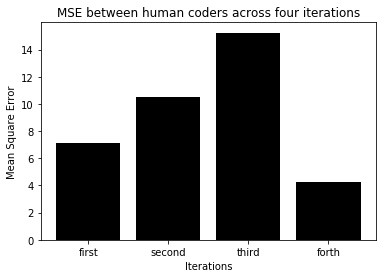

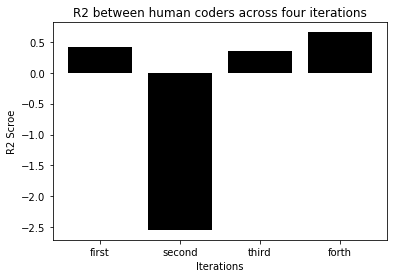

In [17]:
plt.figure()
plt.bar(['first','second','third','forth'],[first[0],second[0],third[0],forth[0]],color='k',label='MSE')
plt.xlabel('Iterations')
plt.ylabel('Mean Square Error')
plt.title('MSE between human coders across four iterations')
plt.show()
plt.figure()
plt.bar(['first','second','third','forth'],[first[1],second[1],third[1],forth[1]],color='k',label='R2')
plt.xlabel('Iterations')
plt.ylabel('R2 Scroe')
plt.title('R2 between human coders across four iterations')
plt.show()

In [14]:
print('Final: ',forth[0],forth[1])

Final:  2.0603682164846164 0.6564582631019371


In [18]:
print(first)
print(second)
print(third)
print(forth)

[7.140625, 0.41368161757158994]
[10.5375, -2.544995794785534]
[15.2375, 0.35175091068627184]
[4.2451171875, 0.6564582631019371]


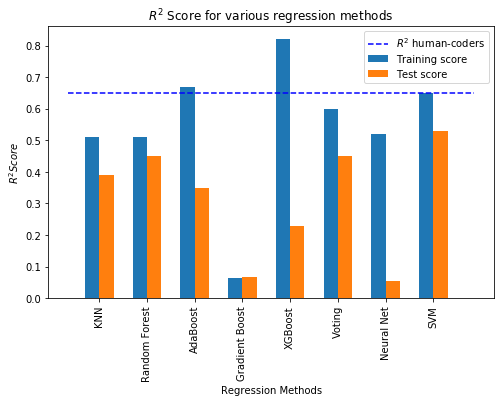

In [7]:
import numpy as np
plt.figure(figsize=(8,5))
train_error = [.51,.51,.67,.065,.82,.60,.52,.65]
test_error = [.39,.45,.35,.068,.23,.45,.055,.53]
x_label=['KNN','Random Forest','AdaBoost','Gradient Boost','XGBoost','Voting','Neural Net','SVM']

x = np.arange(len(train_error))
w=.3
plt.xticks(x+w/2,x_label,rotation=90)




plt.bar(x,train_error,label='Training score',width=w)
plt.bar(x+w,test_error,label='Test score ',width=w)
plt.ylabel(r'$R^2 Score$')
plt.xlabel('Regression Methods')
plt.xticks(rotation=90)
plt.hlines(.65,-0.5,8,color='blue',linestyles='dashed',label='$R^2$ human-coders')
plt.title('$R^2$ Score for various regression methods')
plt.legend()

plt.savefig('r2.png')

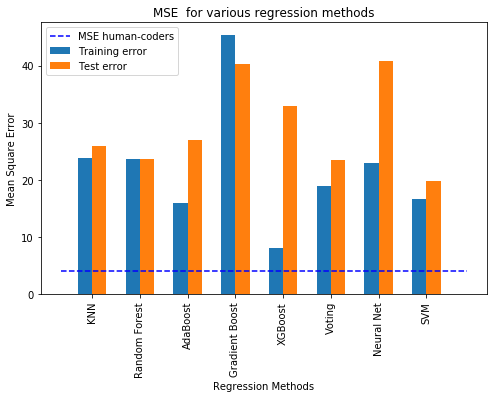

In [8]:
plt.figure(figsize=(8,5))


train_error = [23.8,23.7,16,45.3,8,19,23.02,16.7]
test_error = [26,23.67,27,40.2,33,23.4,40.83,19.8]
x_label=['KNN','Random Forest','AdaBoost','Gradient Boost','XGBoost','Voting','Neural Net','SVM']

x = np.arange(len(train_error))
w=.3
plt.xticks(x+w/2,x_label,rotation=90)


plt.bar(x,train_error,label='Training error',width=w)
plt.bar(x+w,test_error,label='Test error',width=w)
plt.ylabel('Mean Square Error')
plt.xlabel('Regression Methods')
plt.xticks(rotation=90)
plt.hlines(4,-0.5,8,color='blue',linestyles='dashed',label='MSE human-coders')
plt.title('MSE  for various regression methods')
plt.legend()

plt.savefig('mse.png')

## Time Series Regression

In [49]:
svm = SVR(C=50,gamma=.1,kernel='rbf')
svm.fit(X_train,y_train)

SVR(C=50, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [47]:
type(X_train)

pandas.core.frame.DataFrame

In [48]:
type(y_train)

pandas.core.series.Series

In [ ]:
predicted = []

for i in range(len(X_test)):
    